<a href="https://colab.research.google.com/github/DavorJordacevic/KERAS-NEURAL-NETWORKS/blob/master/Convolutional_neural_network_with_Keras_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import backend as K
import warnings
from mpl_toolkits import mplot3d
from matplotlib import cm
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dense, Dropout,Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import adam
from keras.utils import np_utils
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
warnings.filterwarnings("ignore")
K.set_image_data_format('channels_last')
np.random.seed(0)

Using TensorFlow backend.


In [0]:
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [0]:
print(X_digits.shape)
print(y_digits.shape)
print(type(X_digits))
print(type(y_digits))

# Spliting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.33, random_state=42)

(1797, 64)
(1797,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [0]:
X_train = X_train.reshape(X_train.shape[0], 8, 8 , 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 8, 8 , 1).astype('float32')

In [0]:
print('x_train:\t{}' .format(X_train.shape))
print('y_train:\t{}' .format(y_train.shape))
print('x_test:\t\t{}'.format(X_test.shape))
print('y_test:\t\t{}'.format(y_test.shape))

x_train:	(1203, 8, 8, 1)
y_train:	(1203,)
x_test:		(594, 8, 8, 1)
y_test:		(594,)


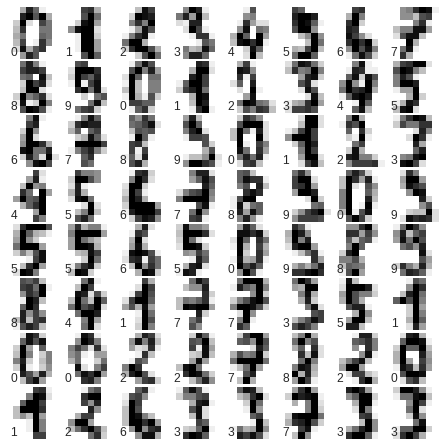

In [0]:
# set up the figure
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [0]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [0]:
# Hyper-parameters
training_epochs = 300 # Total number of training epochs
learning_rate = 0.03 # The learning rate

In [0]:
X_train.shape

(1203, 8, 8, 1)

In [0]:
# create a model
def create_model():
  model = Sequential()
  model.add(Conv2D(64,input_shape=(8,8,1),padding="same", kernel_size=(3, 3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.3))
  model.add(Flatten())
  model.add(Dense(10, activation='softmax'))
 
  # Compile a model
  model.compile(loss='categorical_crossentropy', optimizer=adam(learning_rate), metrics=['accuracy'])
  return model
model = create_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 8, 8, 64)          640       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                10250     
Total params: 10,890
Trainable params: 10,890
Non-trainable params: 0
_________________________________________________________________


In [0]:
results = model.fit(
 X_train, y_train,
 epochs= training_epochs,
 batch_size = 128,
 validation_data = (X_test, y_test),
 verbose = 0
)

In [0]:
prediction_values = model.predict_classes(X_test)

In [0]:
print("Test-Accuracy:","%.2f%%" % (np.mean(results.history["val_acc"])*100))

Test-Accuracy: 97.43%


In [0]:
print("Evaluating on training set...")
(loss, accuracy) = model.evaluate(X_train,y_train)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))


print("Evaluating on testing set...")
(loss, accuracy) = model.evaluate(X_test, y_test)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Evaluating on training set...
1203/1203 [==============================] - 0s 67us/step
loss=0.0483, accuracy: 99.6675%
Evaluating on testing set...
594/594 [==============================] - 0s 55us/step
loss=0.2627, accuracy: 97.9798%


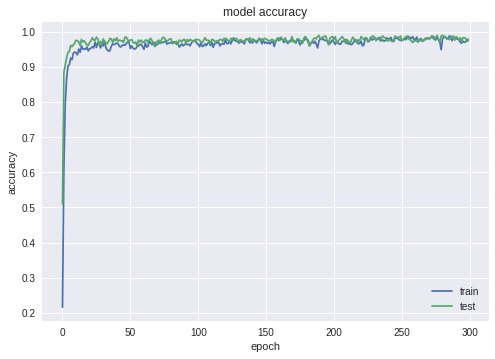

In [0]:
# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='down right')

Maximum Loss : 8.6554

Minimum Loss : 0.0840

Loss difference : 8.5715


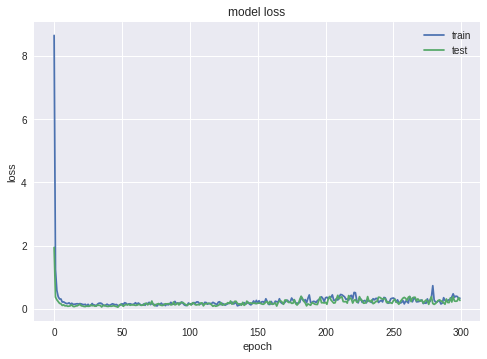

In [0]:
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

max_loss = np.max(results.history['loss'])
min_loss = np.min(results.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("")
print("Minimum Loss : {:.4f}".format(min_loss))
print("")
print("Loss difference : {:.4f}".format((max_loss - min_loss)))

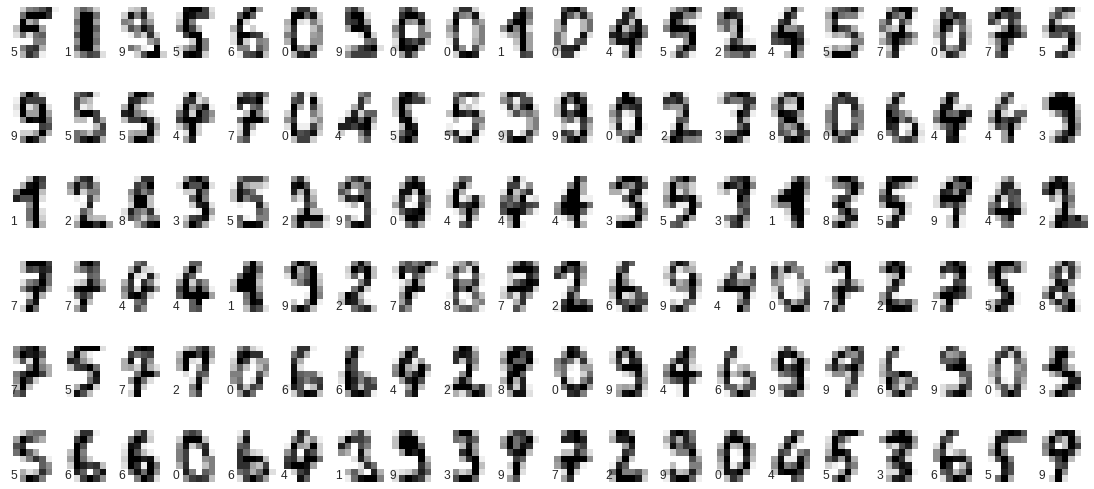

In [0]:
# set up the figure
fig = plt.figure(figsize=(15, 7))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(120):
    ax = fig.add_subplot(6, 20, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i+50,:].reshape((8,8)),cmap=plt.cm.gray_r, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(prediction_values[i+50]))

In [0]:
#from google.colab import files
#files.upload()

{}

In [0]:
import cv2
image = cv2.imread('broj_4_2.png') 
grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

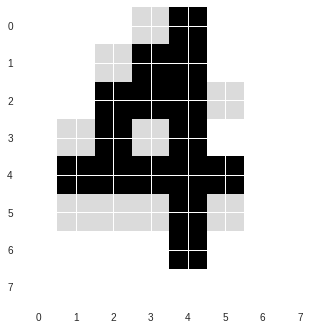

In [0]:
imagem = cv2.bitwise_not(image)
plt.imshow(imagem[:,:,0])

In [0]:
predict = model.predict_classes(imagem[:,:,0].reshape(1,8,8,1))

In [0]:
print(predict)

[4]
